<a href="https://colab.research.google.com/github/abmorte/MATE33/blob/main/preproc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pré-processamento dados estruturados: toy

In [12]:
import numpy as np # array and vector manipulation
import pandas as pd # data manipulation
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from joblib import Parallel, delayed
import multiprocessing as mp
from google.colab import files

In [13]:
data_teste = pd.read_csv('toy.csv')
data_teste

,cpf,sexo,salario,estado,poupanca,altura,peso,total.emprestimo,financiamento
0,741132012,M,5124.00,MA,-1000.00,1.93,85.62,0.00,S
1,246313939,F,4772.45,SP,15012.90,1.84,99.12,NaN,S
2,431872706,F,5001.80,BA,0.00,1.66,104.39,0.00,N
3,127070574,F,5279.32,DF,0.00,1.73,72.57,0.00,S
4,620680270,M,5327.52,RS,8172.68,2.05,97.89,0.00,S
...,...,...,...,...,...,...,...,...,...
205,132343102,M,4610.80,SC,15116.02,1.62,103.20,461.08,N
206,792789534,M,5489.12,RN,14428.67,1.44,56.38,0.00,N
207,813971610,M,4525.37,PB,-1000.00,1.56,129.89,452.54,N
208,839747002,M,4297.15,MA,5542.76,2.10,106.36,0.00,N


In [ ]:
data_teste['estado'].unique()

array(['MA', 'SP', 'BA', 'DF', 'RS', 'SE', 'RN', 'AL', 'PA', 'AP', 'MG',
       'PE', 'PR', 'ES', 'AC', 'PI', 'RJ', 'RR', 'MS', 'TO', 'MT', 'CE',
       'GO', 'RO', 'PB', 'SC', 'AM'], dtype=object)

In [ ]:
data_teste.describe()

,cpf,salario,poupanca,altura,peso,total.emprestimo
count,2.100000e+02,205.000000,205.000000,210.000000,210.000000,205.000000
mean,5.313211e+08,5798.792683,3907.507220,2.240238,92.825905,154.011610
std,2.789570e+08,3923.162459,6243.935327,2.131078,19.849117,228.496524
min,1.959378e+07,4000.000000,-1000.000000,1.400000,55.550000,0.000000
25%,3.015684e+08,4581.440000,0.000000,1.620000,77.975000,0.000000
50%,5.711293e+08,5094.260000,0.000000,1.785000,95.180000,0.000000
75%,7.661590e+08,5489.120000,7306.130000,1.977500,106.230000,443.270000
max,9.999668e+08,25715.660000,19528.880000,11.980000,129.890000,600.000000


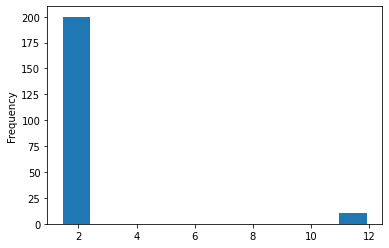

In [ ]:
data_teste['altura'].plot.hist(rwidth=0.9)

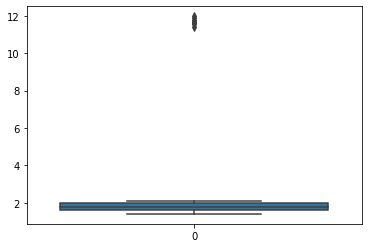

In [ ]:
ax = sns.boxplot(data=data_teste['altura'])

In [ ]:
outliers = boxplot_stats(data_teste["altura"]).pop(0)['fliers']

In [ ]:
np.where(data_teste["altura"].isin(outliers))

(array([ 19,  52,  67,  82,  99, 141, 144, 160, 168, 197]),)

In [ ]:
data_teste.shape

(210, 9)

In [ ]:
data_teste.drop(np.where(data_teste["altura"].isin(outliers))[0], inplace=True)

In [ ]:
data_teste.shape

(200, 9)

<AxesSubplot:>

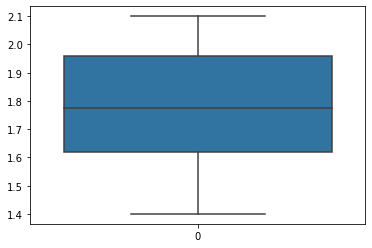

In [ ]:
sns.boxplot(data=data_teste['altura'])

<AxesSubplot:ylabel='Frequency'>

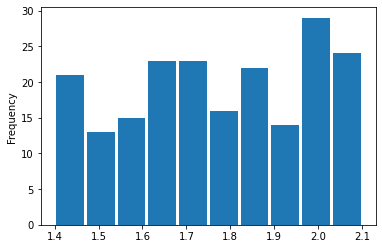

In [ ]:
data_teste['altura'].plot.hist(rwidth=0.9)

<AxesSubplot:ylabel='Frequency'>

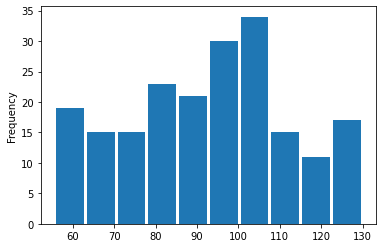

In [ ]:
data_teste['peso'].plot.hist(rwidth=0.9)

In [ ]:
data_teste['peso'] = (data_teste['peso'] - min(data_teste['peso']))/(max(data_teste['peso']) - min(data_teste['peso']))


<AxesSubplot:ylabel='Frequency'>

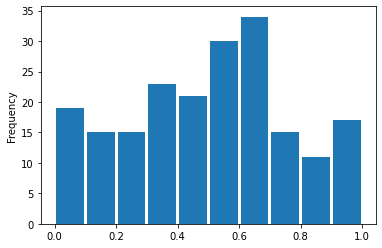

In [ ]:
data_teste['peso'].plot.hist(rwidth=0.9)

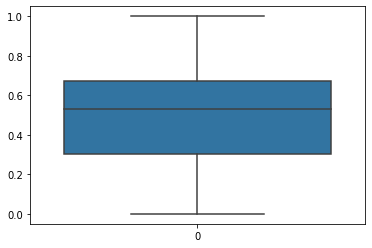

In [ ]:
ax = sns.boxplot(data=data_teste['peso'])

In [ ]:
result = Parallel(n_jobs=mp.cpu_count())(delayed(np.round)(data_teste[i].isna().sum()/len(data_teste[i]),6) for i in data_teste.columns)

perc_nan = pd.DataFrame(data = {'column': data_teste.columns, 'percent_nan': result})
perc_nan.sort_values(by=['percent_nan'], inplace=True, ascending=False)
perc_nan.drop(perc_nan[perc_nan['percent_nan'] == 0].index, inplace=True)
perc_nan

,column,percent_nan
4,poupanca,0.025
7,total.emprestimo,0.025
8,financiamento,0.025
2,salario,0.020


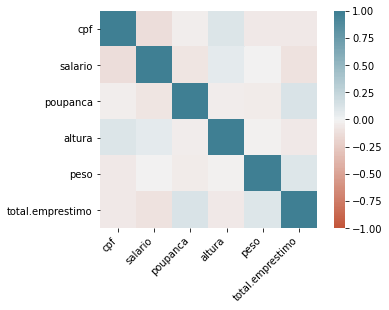

In [ ]:
corr = data_teste.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
pd.get_dummies(pd.Series(list(data_teste['sexo'])))

,F,M
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
195,0,1
196,0,1
197,0,1
198,0,1


### Pré-processamento textos

In [ ]:
import numpy as np # array and vector manipulation
import pandas as pd # data manipulation
import os # using system calls
from nltk.corpus import stopwords
import datetime 
from collections import Counter
import matplotlib.pyplot as plt
import re
import nltk
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from joblib import Parallel, delayed
import multiprocessing as mp
#
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from collections import Counter


from stop_words import get_stop_words
from nltk.corpus import stopwords

from sklearn import preprocessing

In [ ]:
files.upload()

In [ ]:
data = pd.read_csv('data_trump.csv')
data

,Tweet,Date
0,....The Prime Minister was able to save a grea...,08-20-2019 23:51:53
1,Denmark is a very special country with incredi...,08-20-2019 23:51:52
2,CONGRATULATIONS @EricTrump and @LaraLeaTrump o...,08-20-2019 20:00:41
3,https://t.co/WyGbgUGEhJ,08-20-2019 18:13:51
4,RT @FullMeasureNews: Sunday on Full Measure: C...,08-20-2019 18:12:59
...,...,...
5245,Fake News of which there is soooo much (this t...,08-21-2018 11:10:49
5246,Even James Clapper has admonished John Brennan...,08-21-2018 10:55:03
5247,A Blue Wave means Crime and Open Borders. A Re...,08-21-2018 10:38:19
5248,I am hearing so many great things about the Re...,08-21-2018 03:53:49


In [ ]:
data.shape

(5250, 2)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Tweet,Date
0,....The Prime Minister was able to save a grea...,2019-08-20 23:51:53
1,Denmark is a very special country with incredi...,2019-08-20 23:51:52
2,CONGRATULATIONS @EricTrump and @LaraLeaTrump o...,2019-08-20 20:00:41
3,https://t.co/WyGbgUGEhJ,2019-08-20 18:13:51
4,RT @FullMeasureNews: Sunday on Full Measure: C...,2019-08-20 18:12:59
...,...,...
5245,Fake News of which there is soooo much (this t...,2018-08-21 11:10:49
5246,Even James Clapper has admonished John Brennan...,2018-08-21 10:55:03
5247,A Blue Wave means Crime and Open Borders. A Re...,2018-08-21 10:38:19
5248,I am hearing so many great things about the Re...,2018-08-21 03:53:49


<BarContainer object of 24 artists>

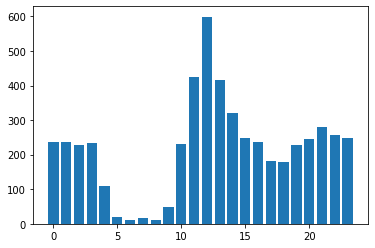

In [ ]:
hour_freq = Counter((data["Date"].dt.hour))
plt.bar(hour_freq.keys(), hour_freq.values())

In [ ]:
data['Date'] = data['Date'].dt.hour
data

,Tweet,Date
0,....The Prime Minister was able to save a grea...,23
1,Denmark is a very special country with incredi...,23
2,CONGRATULATIONS @EricTrump and @LaraLeaTrump o...,20
3,https://t.co/WyGbgUGEhJ,18
4,RT @FullMeasureNews: Sunday on Full Measure: C...,18
...,...,...
5245,Fake News of which there is soooo much (this t...,11
5246,Even James Clapper has admonished John Brennan...,10
5247,A Blue Wave means Crime and Open Borders. A Re...,10
5248,I am hearing so many great things about the Re...,3


In [ ]:
subset = data.iloc[0:10,0]
subset

0    ....The Prime Minister was able to save a grea...
1    Denmark is a very special country with incredi...
2    CONGRATULATIONS @EricTrump and @LaraLeaTrump o...
3                              https://t.co/WyGbgUGEhJ
4    RT @FullMeasureNews: Sunday on Full Measure: C...
5    Sorry I don’t buy Rep. Tlaib’s tears. I have w...
6    The LameStream Media is far beyond Fake News t...
7                   Thank you! https://t.co/LANNJ7IfEl
8    RT @GOPChairwoman: .@realDonaldTrump puts Amer...
9    RT @GOPChairwoman: Since @realDonaldTrump was ...
Name: Tweet, dtype: object

In [ ]:
def run_stopwords(t):
    t = re.sub('\s+(a|an|and|the|of|in|is|are|i|you|me|she|he|they|so|for|wa)(\s+)', '\2', t)
    word_list = nltk.word_tokenize(re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", t))
    words = set(nltk.corpus.words.words())
    stop_words = set(stopwords.words('english'))

    word_list = [w for w in word_list if w in words and w.isalpha()]
    filtered_sentence = ' '.join([w for w in word_list if not w in stop_words])
    return (filtered_sentence)
    


def tweets_to_mat(t):
    # convert to lowercase
    t = t.str.lower()
    
    # clean dataset
    regex = (r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}"
             r"www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))"
             r"[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})|\b(R|r)(T|t)\b|\b[0-9]+\b"
             r"|\-\-")
    clean = np.array([re.sub(regex, "", xi, flags=re.MULTILINE).strip() for xi in t])
    
    # lemmatizer
    lemmatizer = WordNetLemmatizer()

    word_list = np.array([nltk.word_tokenize(x) for x in clean])
    
    lemmatized_output = ([' '.join([lemmatizer.lemmatize(w) for w in ws]) for ws in word_list])
     
    # resp = Parallel(n_jobs=mp.cpu_count())(delayed(run_stopwords)(text) for text in lemmatized_output)
    resp = Parallel(n_jobs=1)(delayed(run_stopwords)(text) for text in lemmatized_output)

    vec = CountVectorizer() #freq
    #vec = TfidfVectorizer() #tfidf
    X = vec.fit_transform(resp)
    df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
    return (df)
    

In [ ]:
### Full
tw11 = data.loc[np.where(data["Date"] == 11)]

In [ ]:
mtw11 = tweets_to_mat(tw11['Tweet'])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
### uncomment for testing (10 terms)
cmtw11 = mtw11.iloc[:, np.argsort(np.sum(mtw11.values, axis=0))[::-1][0:10]]
### full version
#cmtw11 = mtw11.iloc[:,np.argsort(mtw11.sum(axis=0))[::-1]]

In [ ]:
cmtw11[cmtw11 > 1] = 1 

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/rios/.local/lib/python3.6/site-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [ ]:
cmtw11 = cmtw11.T.dot(cmtw11)
np.fill_diagonal(cmtw11.values, 0)
cmtw11.iloc[:,:] = np.triu(cmtw11)

In [ ]:
cmtw11

,ha,great,people,trump,democrat,president,get,new,news,never
ha,0,7,6,5,0,3,3,4,7,4
great,0,0,8,1,2,4,0,3,1,3
people,0,0,0,5,3,1,2,2,5,6
trump,0,0,0,0,4,6,3,4,2,1
democrat,0,0,0,0,0,3,2,0,0,4
president,0,0,0,0,0,0,2,2,1,2
get,0,0,0,0,0,0,0,1,5,1
new,0,0,0,0,0,0,0,0,2,2
news,0,0,0,0,0,0,0,0,0,3
never,0,0,0,0,0,0,0,0,0,0
